# Climate Prediction Model (SDG 13: Climate Action)
## Overview
This notebook predicts yearly average temperature changes using LSTM, supporting SDG 13: Climate Action.

# Step 1: Install and Import Libraries

In [1]:
!pip install numpy pandas scikit-learn tensorflow matplotlib seaborn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load and Preprocess Data

In [2]:
def load_climate_data(file_path='./data.csv'):
    with open(file_path, 'r') as f:
        for _ in range(7):
            next(f)
        data_lines = [line for line in f if line.strip() and not line.startswith('Year')]
    processed_data = []
    for line in data_lines:
        parts = line.split()
        if len(parts) >= 19 and parts[0].isdigit():
            year = int(parts[0])
            monthly_temps = [float(x) if x != '****' else np.nan for x in parts[1:13]]
            yearly_avg = float(parts[13]) if parts[13] != '****' else np.nan
            processed_data.append({
                'Year': year, 'Jan': monthly_temps[0], 'Feb': monthly_temps[1], 'Mar': monthly_temps[2],
                'Apr': monthly_temps[3], 'May': monthly_temps[4], 'Jun': monthly_temps[5], 'Jul': monthly_temps[6],
                'Aug': monthly_temps[7], 'Sep': monthly_temps[8], 'Oct': monthly_temps[9], 'Nov': monthly_temps[10],
                'Dec': monthly_temps[11], 'Yearly_Avg': yearly_avg
            })
    data = pd.DataFrame(processed_data)
    temp_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Yearly_Avg']
    for col in temp_columns:
        data[col] = data[col] / 100.0
    return data.dropna()

data = load_climate_data()

# Step 3: Prepare Data

In [3]:
sequence_length = 10
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data['Yearly_Avg'].iloc[i:(i + sequence_length)].values)
    y.append(data['Yearly_Avg'].iloc[i + sequence_length])
X, y = np.array(X), np.array(y).reshape(-1, 1)
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


# Step 4: Build and Train Model

In [4]:
model = Sequential([
    LSTM(128, input_shape=(sequence_length, 1), return_sequences=True),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32, return_sequences=False),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1)
    ])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

c:\Users\aqual\OneDrive\Desktop\PLP\AI for Software engineering\group 47 week 2\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 309ms/step - loss: 0.1528 - mae: 0.3188 - val_loss: 0.0593 - val_mae: 0.1862
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0499 - mae: 0.1664 - val_loss: 0.0222 - val_mae: 0.1254
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0318 - mae: 0.1477 - val_loss: 0.0139 - val_mae: 0.0960
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0255 - mae: 0.1208 - val_loss: 0.0099 - val_mae: 0.0828
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0092 - mae: 0.0764 - val_loss: 0.0065 - val_mae: 0.0662
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0132 - mae: 0.0916 - val_loss: 0.0050 - val_mae: 0.0577
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0086 - mae: 0.0761 - val_loss: 0.0040 - val_mae: 0.0500
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0084 - mae: 0.0737 - val_loss: 0.0093 - val_mae: 0.0801
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0116 - mae

# Step 5: Evaluate Model

In [5]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest MAE: {test_mae:.4f}")
predictions = model.predict(X_test)
actual = y_scaler.inverse_transform(y_test)
predictions = y_scaler.inverse_transform(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0038 - mae: 0.0511

Test MAE: 0.0511
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step


# Step 6: Visualize Results (Updated with Trend Over Years)
# Plot sample-based comparison

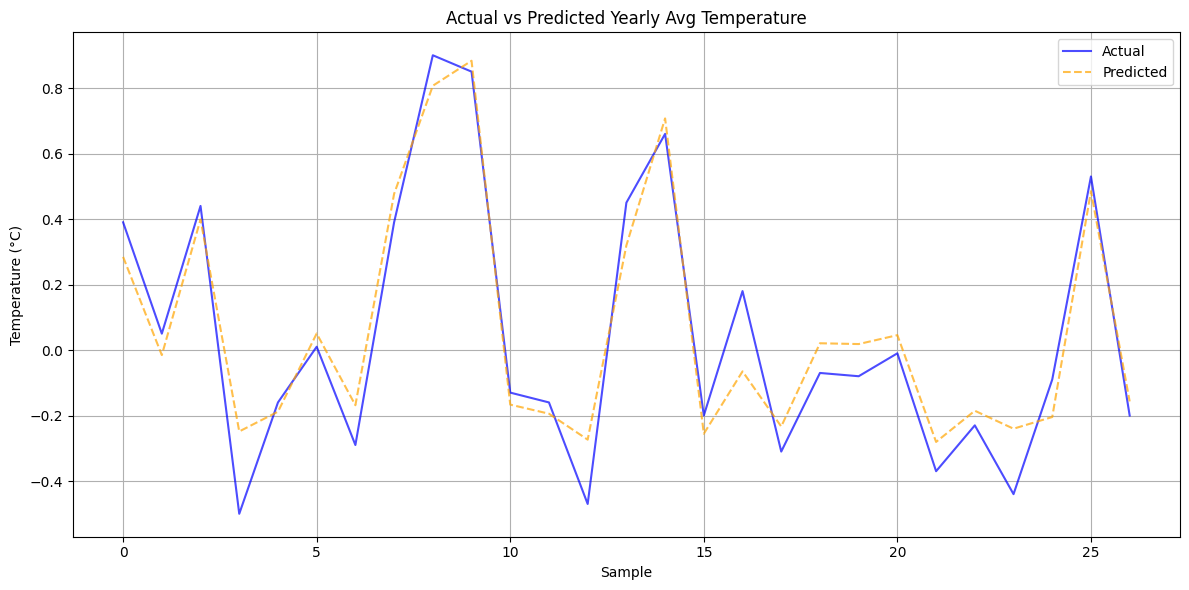

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(actual.flatten(), label='Actual', color='blue', alpha=0.7)
plt.plot(predictions.flatten(), label='Predicted', color='orange', linestyle='--', alpha=0.7)
plt.xlabel('Sample')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Yearly Avg Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('prediction_plot.png')
plt.show()

# Plot trend over years

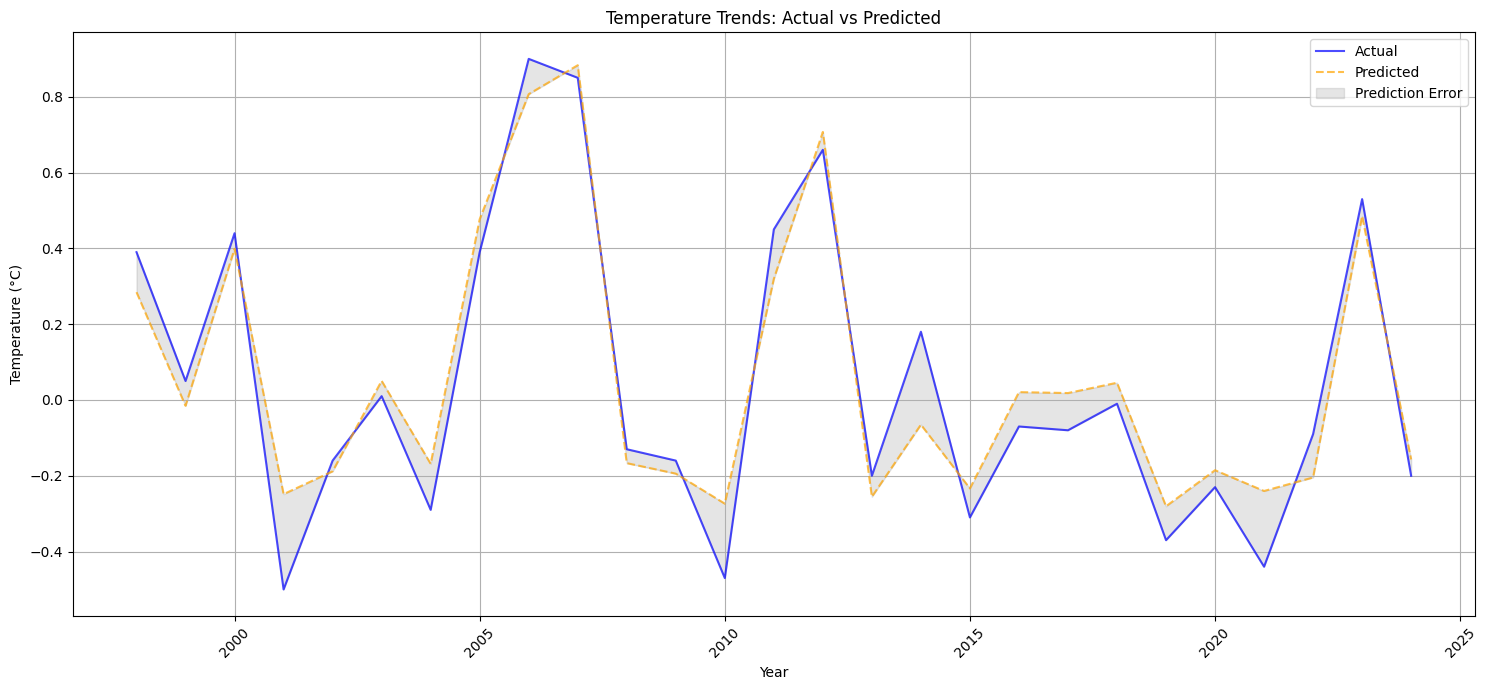

In [10]:
years = data['Year'].iloc[sequence_length + len(X_train):].values  # Align with test set
plt.figure(figsize=(15, 7))
plt.plot(years, actual.flatten(), label='Actual', color='blue', alpha=0.7)
plt.plot(years, predictions.flatten(), label='Predicted', color='orange', linestyle='--', alpha=0.7)
plt.fill_between(years, actual.flatten(), predictions.flatten(), color='gray', alpha=0.2, label='Prediction Error')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('temperature_trends.png')
plt.show()

# Step 7: Ethical Reflection
## Potential biases may arise from incomplete data. This model supports SDG 13 by raising climate awareness and uses open data for fairness.

Potential Biases: The dataset might not fully represent global temperature changes if certain regions or time periods are underrepresented.
Limitations for Decision-Making: The model, while useful for educational purposes, should not be used for critical policy decisions without validation by climate experts, as it relies on simplified assumptions and historical data that may not capture future variability.
Alignment with SDG 13: By predicting temperature trends, this project raises awareness of climate change, supporting the United Nations Sustainable Development Goal 13 (Climate Action). It encourages informed discussions on sustainability.
Fairness and Transparency: Using open-source data and making the methodology accessible promotes fairness. However, ensuring diverse data sources and acknowledging uncertainties are key to maintaining trust.